<h1> Brain MRI Dementia Classifier <h1>

<img src='https://cdn.pixabay.com/photo/2019/10/15/05/15/quantum-physics-4550602_1280.jpg' width= '800' align="center">

<h2> "The human brain has 100 billion neurons, each neuron connected to 10 thousand other neurons. Sitting on your shoulders is the most complicated object in the known universe." - Michio Kaku

In [72]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import tensorflow as tf
import matplotlib.pyplot as plt

In [73]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 32
IMAGE_SIZE = [224, 224]
EPOCHS = 25

In [74]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Alzheimer_s Dataset/train",
    validation_split=0.3,
    subset="training",
    seed=1337,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Alzheimer_s Dataset/train",
    validation_split=0.3,
    subset="validation",
    seed=1337,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
)

Found 5121 files belonging to 4 classes.
Using 3585 files for training.
Found 5121 files belonging to 4 classes.
Using 1536 files for validation.


In [75]:
class_names = ['Mild Dementia', 'Moderate Dementia', 'Non Dementia', 'Very Mild Dementia']
train_ds.class_names = class_names
val_ds.class_names = class_names

NUM_CLASSES = len(class_names)

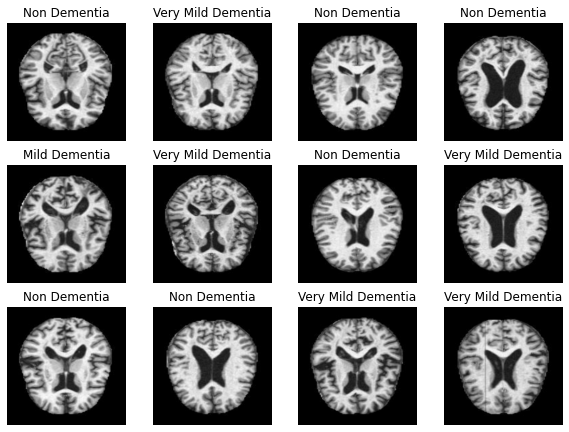

In [76]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [77]:
def one_hot_label(image, label):
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label

train_ds = train_ds.map(one_hot_label, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(one_hot_label, num_parallel_calls=AUTOTUNE)

In [92]:
def plt_dynamic(x,vy,ty,ax,colors=['b']):
  ax.plot(x,vy,'b',label='Validation Loss')
  ax.plot(x,ty,'r',label='Train Loss')
  plt.legend()
  plt.grid()
  fig.canvas.draw()

In [97]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))

In [98]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 774400)            0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               99123328  
_________________________________________________________________
dropout_23 (Dropout)         (None, 128)             

In [99]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [100]:
history = model.fit(
    train_ds, batch_size=BATCH_SIZE,
    validation_data=val_ds,
    epochs=EPOCHS
)

Epoch 1/25
113/113 [==============================] - 188s 2s/step - loss: 100.0786 - accuracy: 0.4848 - val_loss: 1.0327 - val_accuracy: 0.5085
Epoch 2/25
113/113 [==============================] - 187s 2s/step - loss: 1.0477 - accuracy: 0.4999 - val_loss: 0.9946 - val_accuracy: 0.5247
Epoch 3/25
113/113 [==============================] - 190s 2s/step - loss: 0.9967 - accuracy: 0.5372 - val_loss: 0.9459 - val_accuracy: 0.5566
Epoch 4/25
113/113 [==============================] - 195s 2s/step - loss: 0.9219 - accuracy: 0.5796 - val_loss: 0.9111 - val_accuracy: 0.5898
Epoch 5/25
113/113 [==============================] - 189s 2s/step - loss: 0.8623 - accuracy: 0.6075 - val_loss: 0.8973 - val_accuracy: 0.5846
Epoch 6/25
113/113 [==============================] - 190s 2s/step - loss: 0.8271 - accuracy: 0.6268 - val_loss: 0.8808 - val_accuracy: 0.6003
Epoch 7/25
113/113 [==============================] - 195s 2s/step - loss: 0.7394 - accuracy: 0.6748 - val_loss: 0.6921 - val_accuracy: 0.72

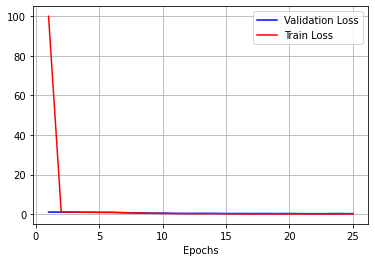

In [107]:
fig,ax=plt.subplots(1,1)
ax.set_xlabel('Epochs')

x=list(range(1,EPOCHS+1))

vy=history.history['val_loss']
ty=history.history['loss']
plt_dynamic(x,vy,ty,ax)

In [121]:
score=model.evaluate(val_ds,verbose=0)
print("The test accuracy for the model is %f "%(score[1]*100))

The test accuracy for the model is 93.164062 


<h2> References <h2>

1. https://www.kaggle.com/marwaelgeneedy/alzheimer-mri-model-tensorflow-2-3-1
2. Krohn, J., Beyleveld, G., & Bassens, A. (2019). Deep Learning Illustrated: A Visual, Interactive Guide to Artificial Intelligence. Addison-Wesley Professional